beta0:  0.106957467495015
beta1:  0.8206581744475389
MSE:  0.04642818887850445
RMSE  0.2154720141422186
MAE  0.16584545918955884


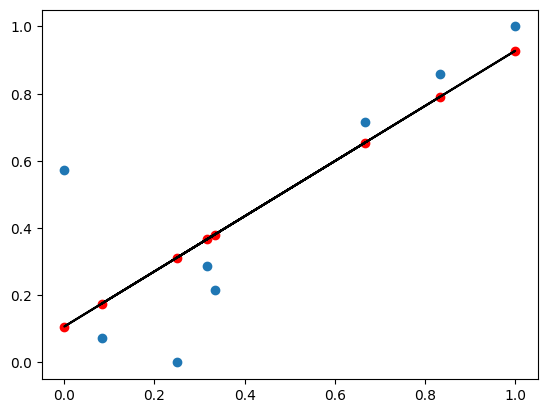

In [2]:
import numpy as  np
import matplotlib.pyplot as plt

def normalize(data):
    """
    Normalizes the input data to the range [0, 1].

    Args:
    data (array-like): The data to be normalized.

    Returns:
    The normalized data.
    """
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min)
    return normalized_data
    

def beta1(x, y):
    """
    Calculates the slope of the regression line (i.e., beta1) given two arrays of x and y values.

    Args:
    x (array-like): The array of x values.
    y (array-like): The array of y values.

    Returns:
    The slope of the regression line.
    """
    x_hat = np.average(x)
    y_hat = np.average(y)


    x_hat_diff = x - x_hat
    y_hat_diff = y - y_hat

    x_hat_diff_squared = x_hat_diff ** 2

    x_hat_diff_squared_sum = np.sum(x_hat_diff_squared)
    y_hat_diff_x_hat_diff_sum = np.sum(y_hat_diff * x_hat_diff)

    beta1 = y_hat_diff_x_hat_diff_sum / x_hat_diff_squared_sum
    return beta1


def beta0(x, y):
    """
    Calculates the intercept of the regression line (i.e., beta0) given two arrays of x and y values.

    Args:
    x (array-like): The array of x values.
    y (array-like): The array of y values.

    Returns:
    The intercept of the regression line.
    """
    x_mean = np.average(x)
    y_mean = np.average(y)

    slope = beta1(x, y)

    intercept = y_mean - slope * x_mean
    return intercept


def predict(beta0, beta1, x):
    """
    Predicts the y values for a given array of x values and the regression line coefficients.

    Args:
    beta0 (float): The intercept of the regression line.
    beta1 (float): The slope of the regression line.
    x (array-like): The array of x values.

    Returns:
    An array of predicted y values.
    """
    y_pred = beta0 + beta1 * x
    return y_pred


def MAE(y, y_pred):
    """
    Calculates the mean absolute error (MAE) between the actual y values and the predicted y values.

    Args:
    y (array-like): The array of actual y values.
    y_pred (array-like): The array of predicted y values.

    Returns:
    The mean absolute error (MAE) between the actual y values and the predicted y values.
    """
    mae = np.mean(np.abs(y - y_pred))
    return mae

def MSE(y, y_pred):
    """
    Calculates the mean squared error (MSE) between the actual y values and the predicted y values.

    Args:
    y (array-like): The array of actual y values.
    y_pred (array-like): The array of predicted y values.

    Returns:
    The mean squared error (MSE) between the actual y values and the predicted y values.
    """
    mse = np.mean((y - y_pred)**2)
    return mse

def RMSE(y, y_pred):
    """
    Calculates the root mean squared error (RMSE) between the actual y values and the predicted y values.

    Args:
    y (array-like): The array of actual y values.
    y_pred (array-like): The array of predicted y values.

    Returns:
    The root mean squared error (RMSE) between the actual y values and the predicted y values.
    """
    mse = MSE(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse


w = [230,195,220,180,200,185,240,199]
color = [170,110,160,150,125,115,180,130]

x = w
y = color

x = normalize(x)
y = normalize(y)



y_predect = []



for item in x:
    y_predect.append(predict(beta0(x,y),beta1(x,y),item))

y_predect = np.array(y_predect)


plt.scatter(x,y)
plt.scatter(x,y_predect,color='red')
plt.plot(x,y_predect,color='black')

print("beta0: " , beta0(x,y))
print("beta1: ", beta1(x,y))

print("MSE: ",MSE(y,y_predect))
print("RMSE ",RMSE(y,y_predect))
print("MAE ",MAE(y,y_predect))


